<a href="https://colab.research.google.com/github/jacksonns/TensorFlow_Practice/blob/main/02_tf_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Classification

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


#### 0. Familiarize with Classification

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

x,y = make_circles(n_samples, noise = 0.03, random_state = 42)

Visualizing the data with pandas and pyplot

In [3]:
import pandas as pd

circles = pd.DataFrame({'x0':x[:,0], 'x1':x[:, 1], 'label': y})
circles.head()

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [4]:
# See what kind of label we are dealing with (Binary Classification)
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

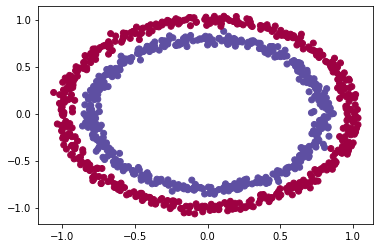

In [5]:
from matplotlib import pyplot as plt

# using y to define the color of the point and color map Spectral
plt.scatter(x[:,0], x[:,1], c = y, cmap=plt.cm.Spectral)  

Ploting decision boundary function

In [6]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Creating models

In [7]:
# This one has low accuracy (about 50%)
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=(None, 1)),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

history = model.fit (x, y, epochs = 100, verbose = 0)
model.evaluate(x,y)

32/32 [==============================] - 1s 3ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6939496994018555, 0.5]

doing multiclass classification...


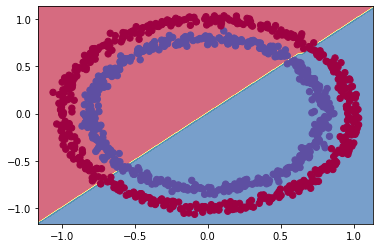

In [8]:
plot_decision_boundary(model, x, y)

In [9]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),   # Adding activation
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation = tf.keras.activations.relu),
])

model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history = model2.fit (x, y, epochs = 100, verbose = 0)

In [10]:
model2.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 1.0000


[0.006385345943272114, 1.0]

doing binary classifcation...


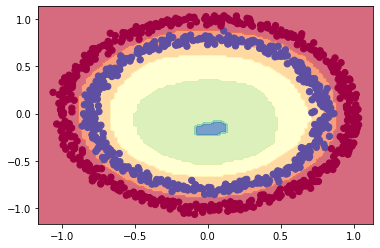

In [11]:
plot_decision_boundary(model2, x, y)

In [12]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid),   # sigmoid on output layer can improve results with less neurons
])

model3.compile(loss = tf.keras.losses.binary_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history = model3.fit (x, y, epochs = 100, verbose = 0)
model3.evaluate (x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classifcation...


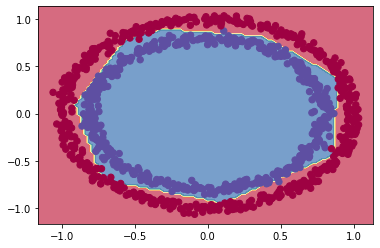

In [13]:
plot_decision_boundary(model3, x, y)

#### 1. Play with neural networks in the [TensorFlow Playground](https://playground.tensorflow.org/) for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?

When decreased to 1e-5, the training loss keep on 0.5 for too long. When set to 1, starts an interesting oscillatory pattern and if it's set to 10, the model doesn't learn anything, because it goes too fast. Lower learning rates, just like 0.001, can converge to lower training loss, but need more epochs. The best value found for this example was 0.1, which can converge to a good accuracy with few epochs. An interesting fact is that if we increase to 0.3, we get another oscillatory pattern.

#### 2. Replicate the model pictured in the [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
![tensorflow playground example neural network](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)
*Try this network out for yourself on the [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.*

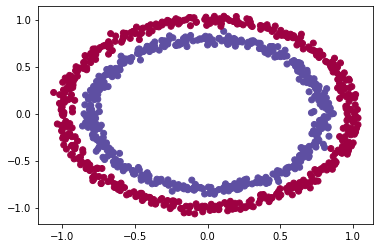

In [14]:
# Using the same dataset as above (Exercise 0.)

plt.scatter(x[:,0], x[:,1], c = y, cmap=plt.cm.Spectral)  

In [15]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation = "relu"),
  tf.keras.layers.Dense(6, activation = "relu"),
  tf.keras.layers.Dense(6, activation = "relu"),
  tf.keras.layers.Dense(6, activation = "relu"),
  tf.keras.layers.Dense(6, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid"),                     
])

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_2.fit(x, y, epochs = 100, verbose = 0)

In [17]:
model_2.evaluate(x, y)

32/32 [==============================] - 1s 3ms/step - loss: 0.0011 - accuracy: 1.0000


[0.001086818054318428, 1.0]

In [16]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 18        
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
 dense_11 (Dense)            (None, 6)                 42        
                                                                 
 dense_12 (Dense)            (None, 6)                 42        
                                                                 
 dense_13 (Dense)            (None, 6)                 42        
                                                                 
 dense_14 (Dense)            (None, 1)                 7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable 

#### 3. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.

#### 4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the [classifcation tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.

#### 5. Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

#### 6. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

#### 7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.
